In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
url = r"C:\Users\gonza\Downloads\Consumo_cerveja.csv"
df = pd.read_csv(url,parse_dates=["Data"],index_col=["Data"])
df.dropna(inplace=True,how="any")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(4)
memory usage: 20.0+ KB


In [37]:
df.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [38]:
df.groupby("Final de Semana")['Consumo de cerveja (litros)'].mean()

Final de Semana
0.0    23.998222
1.0    28.922721
Name: Consumo de cerveja (litros), dtype: float64

In [39]:
df.groupby("Final de Semana").describe()

Consumo de cerveja (litros)                               \
                                      count       mean       std     min   
Final de Semana                                                            
0.0                                   261.0  23.998222  3.787527  14.343   
1.0                                   104.0  28.922721  3.830191  20.738   

                                                    
                    25%      50%       75%     max  
Final de Semana                                     
0.0              21.327  23.6140  26.36200  35.861  
1.0              26.045  29.4825  31.83375  37.937

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

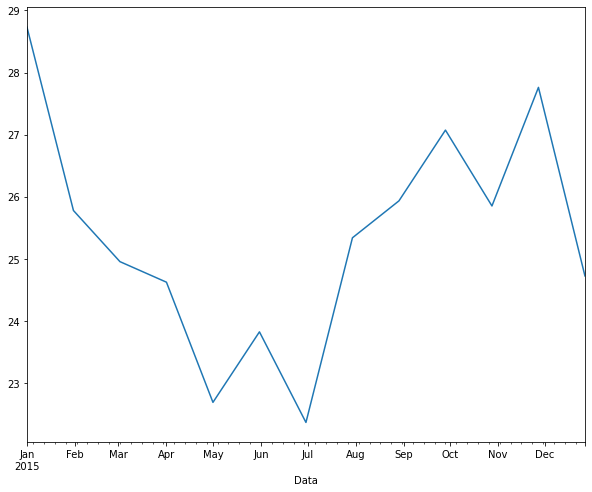

In [40]:
df['Consumo de cerveja (litros)'].resample("30D").mean().plot(figsize=(10,8))

In [34]:
df.isnull().sum() / len(df)  * 100

Data                           0.0
Temperatura Media (C)          0.0
Temperatura Minima (C)         0.0
Temperatura Maxima (C)         0.0
Precipitacao (mm)              0.0
Final de Semana                0.0
Consumo de cerveja (litros)    0.0
dtype: float64

In [41]:
df.head(3)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Data,,,,,,
2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2015-01-03,"24,82","22,4","29,9",0,1.0,30.814


In [60]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[)(]' ,'')


In [61]:
df['Temperatura_Media_C'] = df['Temperatura_Media_C'].str.replace(',' ,'.').astype(float)
df['Temperatura_Minima_C'] = df['Temperatura_Minima_C'].str.replace(',' ,'.').astype(float)
df['Temperatura_Maxima_C'] = df['Temperatura_Maxima_C'].str.replace(',' ,'.').astype(float)
df['Precipitacao_mm'] = df['Precipitacao_mm'].str.replace(',' ,'.').astype(float)
df['Final_de_Semana'] = df['Final_de_Semana'].astype(int)

In [62]:
df.columns

Index(['Temperatura_Media_C', 'Temperatura_Minima_C', 'Temperatura_Maxima_C',
       'Precipitacao_mm', 'Final_de_Semana', 'Consumo_de_cerveja_litros'],
      dtype='object')

In [63]:
X = df.copy().drop('Consumo_de_cerveja_litros',axis=1)
Y = df['Consumo_de_cerveja_litros']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

In [72]:
import statsmodels.api as sm
X = sm.add_constant(X_train.drop(['Temperatura_Media_C','Temperatura_Minima_C'],axis=1))
model = sm.OLS(y_train, X).fit()


In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Consumo_de_cerveja_litros   R-squared:                       0.742
Model:                                   OLS   Adj. R-squared:                  0.739
Method:                        Least Squares   F-statistic:                     241.2
Date:                       Thu, 05 Nov 2020   Prob (F-statistic):           1.27e-73
Time:                               19:57:49   Log-Likelihood:                -573.60
No. Observations:                        255   AIC:                             1155.
Df Residuals:                            251   BIC:                             1169.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1754      0.869      7.105      0.000       4.464       7.887
Temperatura_Maxima_C     0.6775      0.032     21.205      0.000       0.615       0.740
Precipitacao_mm         -0.0627      0.012     -5.339      0.000      -0.086      -0.040
Final_de_Semana          5.2199      0.329     15.855      0.000       4.571       5.868
==============================================================================
Omnibus:                       25.616   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.249
Skew:                           0.179   Prob(JB):                      0.00981
Kurtosis:                       2.139   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

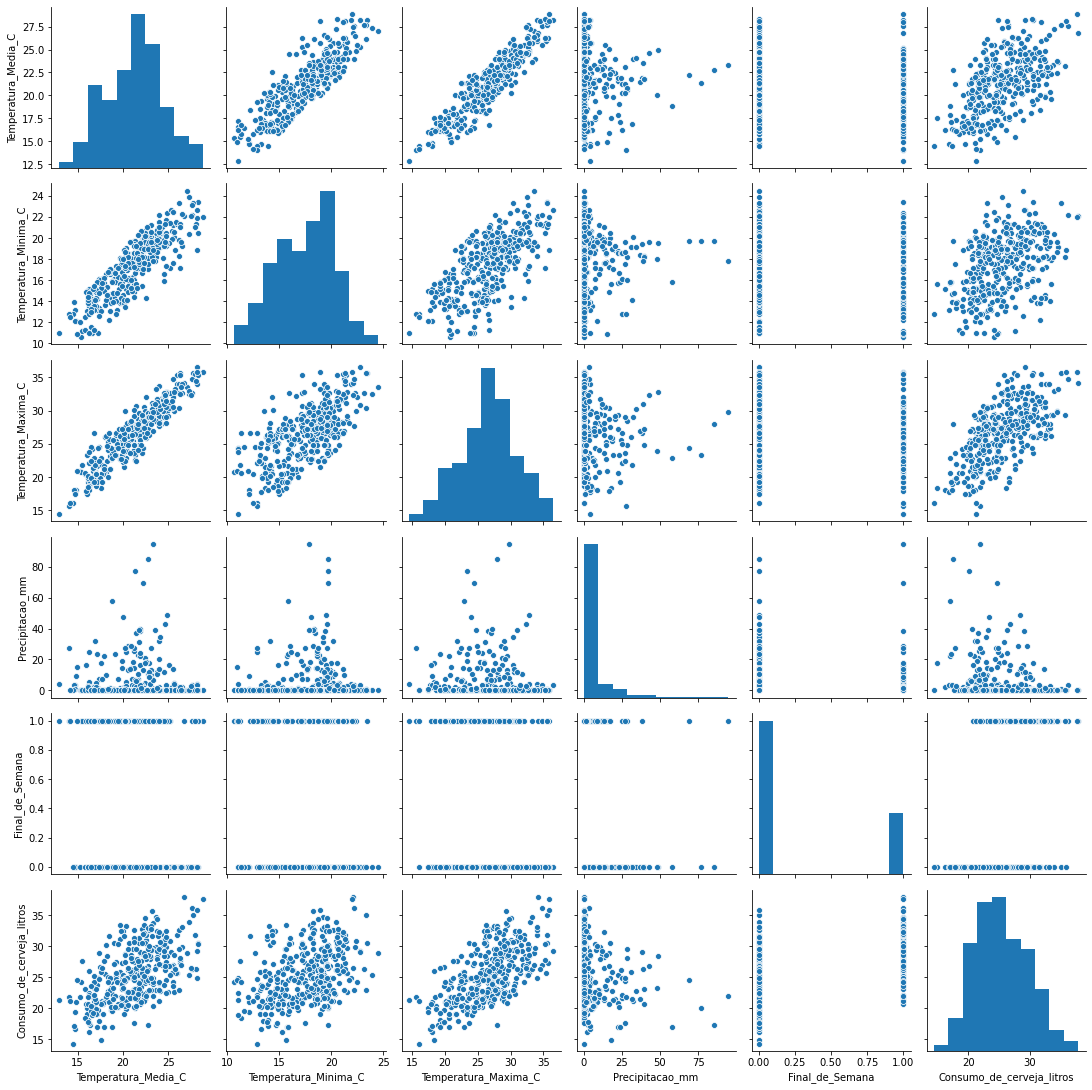

In [74]:
# `pairplot()` may become very slow with the SVG or retina format
import seaborn as sns
%config InlineBackend.figure_format = 'png'
sns.pairplot(df);

In [75]:
X_train = X_train.drop(['Temperatura_Media_C','Temperatura_Minima_C'],axis=1)

In [76]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [81]:
X_test = X_test.drop(['Temperatura_Media_C','Temperatura_Minima_C'],axis=1)

In [82]:
print(f"score para train {lm.score(X_train,y_train)}; score para test {lm.score(X_test,y_test)}")

score para train 0.7424490035682392; score para test 0.6566618325632168


In [101]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y_train,lm.predict(X_train))

0.7424490035682392

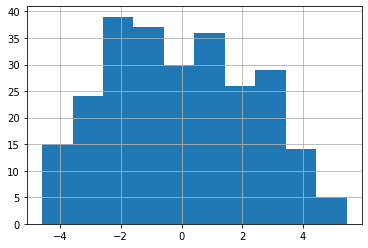

In [104]:
# residuals
residuals = (y_train - lm.predict(X_train))
residuals.hist()

In [84]:
from sklearn.tree import DecisionTreeRegressor
regtree = DecisionTreeRegressor(min_samples_split=10,min_samples_leaf=10,random_state=0)
regtree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=10, random_state=0)

In [85]:
regtree.score(X_train,y_train)

0.7338312046882718

In [86]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [87]:
regressor.score(X_train,y_train)

0.9090412378384755

In [88]:
regressor.score(X_test,y_test)

0.49320435452735223

In [91]:
# cross validation
from sklearn.model_selection import cross_validate
lr_results = cross_validate(linear_model.LinearRegression(),X_train,y_train,cv=4,scoring="r2")

In [96]:
lr_results["test_score"].mean()

0.7302101280464528

In [100]:
import sklearn
print(sklearn.__version__)

0.23.1


### proyecto scrapping

In [2]:
def color_grafica():
    # pregunto usuario color grafica
    pregunta = input("que color quieres usar: r,b,c,g,y?")
    
    # creo lista de colores
    colores = ["r","b","c","g","y"]
    
    # uso if / else para evitar fallos
    if pregunta not in colores:
        print("Los colores son r,b,c,g,y")
        color_grafica()
    
    else:
        # creo una simple grafica de prueba
        X= np.random.randn(50)
        Y= np.random.randn(50)

        plt.scatter(X,Y,c=pregunta)
        plt.title("Grafica de puntos")
        plt.show()

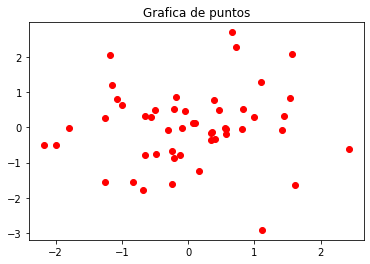

In [3]:
#pregunta de inicio
pregunta_fin = input("quieres ver la grafica Y/N")
try:
    if pregunta_fin == "Y":
        color_grafica()
    elif pregunta_fin == "N":
        print ("gracias por usar el programma")
except:
        print("An exception occurred")

### intro to sklearn
https://www.oreilly.com/content/intro-to-scikit-learn/

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [7]:
X = iris.iloc[:,:-1]
y = iris["species"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [9]:
# baseline para clasificacion naive bayes (modelo simple para darte una primera idea)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.9736842105263158

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

In [11]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X)
X_2d = model.transform(X)

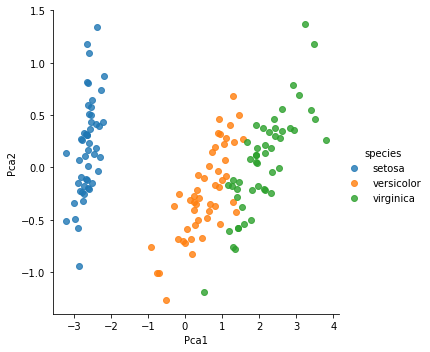

In [12]:
# Now let’s plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn’s lmplot to show the results:
iris["Pca1"] = X_2d[:,0]
iris["Pca2"] = X_2d[:,1]
sns.lmplot("Pca1","Pca2",hue="species",data=iris,fit_reg=False)

Let’s next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in In Depth: Gaussian Mixture Models. A GMM attempts to model the data as a collection of Gaussian blobs.

In [14]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,covariance_type="full")
model.fit(X)
y_predict = model.predict(X)

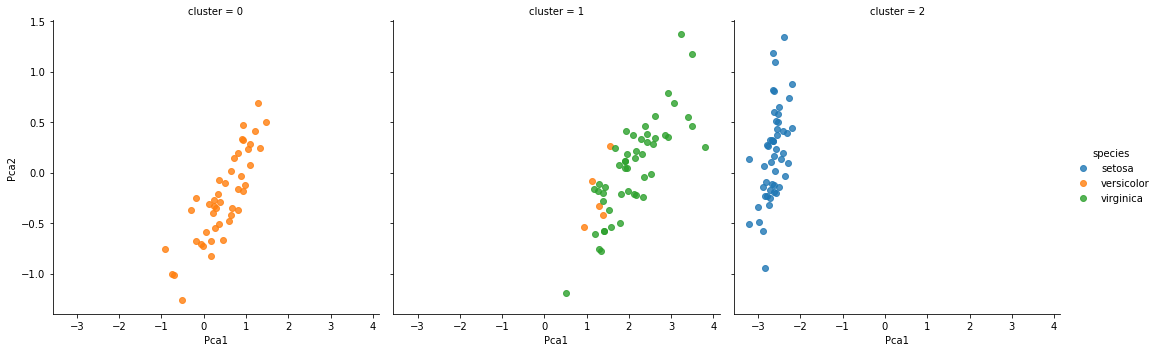

In [15]:
iris["cluster"] = y_predict
sns.lmplot("Pca1","Pca2",hue="species",data=iris,fit_reg=False,col="cluster")

### Application: Exploring Hand-written Digits

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [18]:
X = digits.data
X.shape

(1797, 64)

In [19]:
Y = digits.target

We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead we’ll reduce the dimensions to 2, using an unsupervised method. Here, we’ll make use of a manifold learning algorithm called Isomap (see In-Depth: Manifold Learning), and transform the data to two dimensions

In [20]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

(1797, 2)

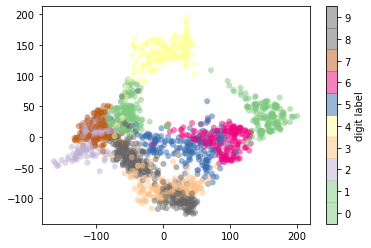

In [22]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,
            edgecolors="none",alpha=0.5,
            cmap=plt.cm.get_cmap("Accent",10))
plt.colorbar(label= "digit label",ticks=range(10))
plt.clim(-0.5,9.5)

### Comparison with Decision Trees and Bagging (micourse.ai)

In [2]:
# Disable warnings in Anaconda
import warnings
import numpy as np
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'retina' 

import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In this example we will look at predicting customer churn. This is a classification problem, so we will use accuracy for model evaluation.

First, let's build a simple classifier which we will use as a baseline. For the sake of simplicity, we will use only numeric features.

In [3]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\telecom_churn.csv"

df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
# choose numeric features
num_var = [var for var in df.columns.values if (df[var].dtype == "int64") or 
            (df[var].dtype == "float64")]

In [8]:
# Divide the dataset into the input and target
X,y = df[num_var].copy(), np.asarray(df["Churn"],dtype="int8")

In [13]:
# Initialize a stratified split of our dataset for the validation process
skf = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
# model
rfc = RandomForestClassifier(random_state=0,n_jobs=1)
# train
results = cross_val_score(rfc,X,y,cv=skf)

print(f"CV accuracy score: {round(results.mean() * 100,2)}%")

CV accuracy score: 92.47%


We have seen how the learning curves change with different values of the basic parameters. Now, let's use GridSearch to find the optimal parameters for our example:

In [14]:
# parameters
parameters = {"max_features":[4,7,10,13],
                "min_samples_leaf":[1,3,5,7],
                "max_depth":[5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=1)#estimators con limite para evitar overfiting
gvc = GridSearchCV(rfc,parameters,n_jobs=1,cv=skf,verbose=1)
gvc.fit(X,y)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  6.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=1, random_state=0),
             n_jobs=1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [15]:
gvc.best_params_, gvc.best_score_

({'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3},
 0.9270914092503297)

## ejercicio scoring (micourse.ai)

In [2]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/credit_scoring_sample.csv"

data = pd.read_csv(url, sep=";")
data.head(3)

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      45063 non-null  int64  
 1   age                                   45063 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45063 non-null  int64  
 3   DebtRatio                             45063 non-null  float64
 4   NumberOfTimes90DaysLate               45063 non-null  int64  
 5   NumberOfTime60-89DaysPastDueNotWorse  45063 non-null  int64  
 6   MonthlyIncome                         45063 non-null  float64
 7   NumberOfDependents                    45063 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


In [3]:
data.isnull().sum() / len(data)

SeriousDlqin2yrs                        0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
NumberOfTimes90DaysLate                 0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
MonthlyIncome                           0.191798
NumberOfDependents                      0.024788
dtype: float64

In [4]:
data.columns

Index(['SeriousDlqin2yrs', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfDependents'],
      dtype='object')

In [5]:
for var in ["MonthlyIncome","NumberOfDependents"]:
    median = data[var].median()
    data[var].fillna(median,inplace=True)

In [6]:
data.isnull().sum() / len(data)

SeriousDlqin2yrs                        0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
NumberOfTimes90DaysLate                 0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
MonthlyIncome                           0.0
NumberOfDependents                      0.0
dtype: float64

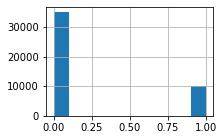

In [7]:
# esta desbalanzada el target
data["SeriousDlqin2yrs"].hist(figsize=(3,2))

In [8]:
# separamos x e y
X = data.copy().drop("SeriousDlqin2yrs",axis=1)
y = data["SeriousDlqin2yrs"]

Question 2. Make an interval estimate of the average age for the customers who delayed the repayment with the confidence level equal 90%. Use the example from the article for reference. Also, use np.random.seed(0) as it was done in the article. What is the resulting interval estimate?

In [14]:
def get_bootstrap_samples(data,n_samples):
    """ generate bootstrap samples"""
    indices = np.random.randint(0,len(data),(n_samples,len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat,alpha):
    """ produce an interval estimate"""
    boundaries = np.percentile(stat,[100*alpha /2., 100*(1-alpha /2)])
    return boundaries

# save data customer who delayed
delayed_customers = data.loc[data["SeriousDlqin2yrs"] == 1,"age"].values

# seed the feed
np.random.seed(0)
# Generate the samples using bootstrapping and calculate the mean for each of them
delayed_customers_score = [np.mean(sample) for sample in get_bootstrap_samples(delayed_customers, 1000)]

# print the resulting intervales estimates
print(f"age for delayed customer: mean interval: {stat_intervals(delayed_customers_score,0.05)}")


age for delayed customer: mean interval: [45.68145322 46.16947187]


### Logistic regresion
Now, we will create a LogisticRegression model and use class_weight='balanced' to make up for our unbalanced classes.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,StratifiedKFold

lr = LogisticRegression(random_state=0,class_weight="balanced")


In [27]:
parameters = {"C":[0.0001,0.001,0.01,0.1,1,10]}
skf = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
gsv = GridSearchCV(lr, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
gsv.fit(X,y)

gsv.best_params_, gsv.best_score_



({'C': 10}, 0.8048394842649456)

In [29]:
gsv.best_estimator_

LogisticRegression(C=10, class_weight='balanced', random_state=0)

In [31]:
#Question 4. Can we consider the best model stable? The model is stable if the standard deviation on validation is less than 0.5%. Save the ROC AUC value of the best model, it will be useful for the following tasks.

gsv.cv_results_["std_test_score"][0]

0.01622940185624157

In [44]:
# Question 5. Feature importance is defined by the absolute value of its corresponding coefficient. First you need to normalize all the feature values so that it will be correct to compare them. What is the most important feature for the best logistic regression model?
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(C=1, class_weight='balanced', random_state=0)
scal = StandardScaler()
lr.fit(scal.fit_transform(X),y)

LogisticRegression(C=1, class_weight='balanced', random_state=0)

In [45]:
lr.coef_.reshape(7,1)

array([[-0.43649637],
       [ 3.26129165],
       [-0.0423206 ],
       [ 3.0385232 ],
       [ 0.09028521],
       [-0.2040922 ],
       [ 0.08533942]])

In [47]:
df_coef = pd.DataFrame({"columnas":X.columns,"coef":lr.coef_.flatten().tolist()}).sort_values(by="coef",ascending=False)
df_coef.style.background_gradient(cmap='viridis')

,columnas,coef
1,NumberOfTime30-59DaysPastDueNotWorse,3.261292
3,NumberOfTimes90DaysLate,3.038523
4,NumberOfTime60-89DaysPastDueNotWorse,0.090285
6,NumberOfDependents,0.085339
2,DebtRatio,-0.042321
5,MonthlyIncome,-0.204092
0,age,-0.436496


### Random forest
Initialize Random Forest with 100 trees and balance target classes:

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight="balanced",random_state=0,n_jobs=1)

In [51]:
# We will search for the best parameters among the following values:
parameters = {"max_features":[1,2,4], "min_samples_leaf":[3,5,7,9],
            "max_depth":[5,10,15]}



In [52]:
# Question 8. How much higher the ROC AUC of the best random forest model than that of the best logistic regression on validation?
gsv = GridSearchCV(rfc, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
gsv.fit(X,y)

gsv.best_params_, gsv.best_score_

({'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 9},
 0.835381730344307)

In [56]:
 1-(0.8048394842649456/0.835381730344307)

0.03656082599121868

In [57]:
### bagging 
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

parameters = {'max_features': [2, 3, 4], 'max_samples': [0.5, 0.7, 0.9], 
              'base_estimator__C': [0.0001, 0.001, 0.01, 1, 10, 100]}

Question 11. Fit a bagging classifier with random_state=42. For the base classifiers, use 100 logistic regressors and use RandomizedSearchCV instead of GridSearchCV. It will take a lot of time to iterate over all 54 variants, so set the maximum number of iterations for RandomizedSearchCV to 20. Don't forget to set the parameters cv and random_state=1. What is the best ROC AUC you achieve?

In [62]:
bag = BaggingClassifier(LogisticRegression(C=1, class_weight='balanced', random_state=0),random_state=0,n_estimators=100,n_jobs=1)
rnd = RandomizedSearchCV(bag,parameters,cv=skf,random_state=0,n_jobs=1,n_iter=20)
rnd.fit(X,y)




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                                                 class_weight='balanced',
                                                                                 random_state=0),
                                               n_estimators=100, n_jobs=1,
                                               random_state=0),
                   n_iter=20, n_jobs=1,
                   param_distributions={'base_estimator__C': [0.0001, 0.001,
                                                              0.01, 1, 10,
                                                              100],
                                        'max_features': [2, 3, 4],
                                        'max_samples': [0.5, 0.7, 0.9]},
                   random_state=0)

In [63]:
rnd.best_score_, rnd.best_estimator_

(0.7910479974947662,
 BaggingClassifier(base_estimator=LogisticRegression(C=10,
                                                     class_weight='balanced',
                                                     random_state=0),
                   max_features=2, max_samples=0.9, n_estimators=100, n_jobs=1,
                   random_state=0))